In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype" )

In [92]:

from sklearn.datasets import fetch_20newsgroups
import pandas as pd
# fetch 20 newsgroups dataset
data= fetch_20newsgroups()

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      shuffle = True) 
newsgroups_test = fetch_20newsgroups(subset='test', 
                                     shuffle = True)

In [94]:
# find topics

print(list(newsgroups_train.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


We can see it has a variety to topics, from science, sports to technology.

To get topics, we performed
1. tokenization
2. removing punctuatinos 
3. stopwords remove
4. stemming


then use LDA to find topics

In [95]:

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zaiyangzhong/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
#test, to see what happen after we lemmatize a word

print(WordNetLemmatizer().lemmatize('gone', pos = 'v'))
print(WordNetLemmatizer().lemmatize('classes', pos = 'v'))
print(WordNetLemmatizer().lemmatize('worked', pos = 'v'))

go
class
work


In [99]:
stemmer = SnowballStemmer("english")


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
# Tokenize and lemmatize
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [103]:
# test, to see preprocess() function is working to perform tokenization

doc_sample = 'This is a test for tokenization.'
print("Original document: ")
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print("nnTokenized and lemmatized document: ")
print(preprocess(doc_sample))

Original document: 
['This', 'is', 'a', 'test', 'for', 'tokenization.']
nnTokenized and lemmatized document: 
['test', 'token']


In [100]:
processed_docs = []
for doc in newsgroups_train.data:
    processed_docs.append(preprocess(doc))
# Preview 'processed_docs
print(processed_docs[:2])

[['lerxst', 'thing', 'subject', 'nntp', 'post', 'host', 'organ', 'univers', 'maryland', 'colleg', 'park', 'line', 'wonder', 'enlighten', 'door', 'sport', 'look', 'late', 'earli', 'call', 'bricklin', 'door', 'small', 'addit', 'bumper', 'separ', 'rest', 'bodi', 'know', 'tellm', 'model', 'engin', 'spec', 'year', 'product', 'histori', 'info', 'funki', 'look', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst'], ['guykuo', 'carson', 'washington', 'subject', 'clock', 'poll', 'final', 'summari', 'final', 'clock', 'report', 'keyword', 'acceler', 'clock', 'upgrad', 'articl', 'shelley', 'qvfo', 'innc', 'organ', 'univers', 'washington', 'line', 'nntp', 'post', 'host', 'carson', 'washington', 'fair', 'number', 'brave', 'soul', 'upgrad', 'clock', 'oscil', 'share', 'experi', 'poll', 'send', 'brief', 'messag', 'detail', 'experi', 'procedur', 'speed', 'attain', 'rat', 'speed', 'card', 'adapt', 'heat', 'sink', 'hour', 'usag', 'floppi', 'disk', 'function', 'floppi', 'especi', 'request', 'summar', 'day',

Bag of words:

to create a dictionary  out of "processed_docs", using gensim.corpora.Dictionary

In [17]:
dictionary = gensim.corpora.Dictionary(processed_docs)


In [105]:
dictionary.filter_extremes(no_below=15,
                           no_above=0.1,
                           keep_n= 100000)

In [106]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]


In [107]:
document_num = 11
bow_doc_x = bow_corpus[document_num]

for i in range(len(bow_doc_x)):
    print('Word {} ("{}") appears {} time.'.format(bow_doc_x[i][0],
                                                   dictionary[bow_doc_x[i][0]],
                                                   bow_doc_x[i][1]))


Word 20 ("small") appears 1 time.
Word 28 ("base") appears 1 time.
Word 86 ("feel") appears 1 time.
Word 95 ("life") appears 2 time.
Word 101 ("opinion") appears 1 time.
Word 123 ("suppos") appears 2 time.
Word 148 ("pretti") appears 1 time.
Word 149 ("requir") appears 2 time.
Word 166 ("clear") appears 1 time.
Word 167 ("code") appears 5 time.
Word 183 ("previous") appears 1 time.
Word 189 ("understand") appears 3 time.
Word 201 ("argument") appears 1 time.
Word 209 ("consid") appears 1 time.
Word 225 ("hand") appears 1 time.
Word 227 ("hard") appears 1 time.
Word 235 ("later") appears 1 time.
Word 241 ("modern") appears 1 time.
Word 259 ("second") appears 1 time.
Word 283 ("direct") appears 1 time.
Word 300 ("appl") appears 1 time.
Word 302 ("avail") appears 1 time.
Word 322 ("interfac") appears 1 time.
Word 336 ("refer") appears 1 time.
Word 392 ("troubl") appears 1 time.
Word 398 ("wrong") appears 3 time.
Word 419 ("abraham") appears 1 time.
Word 420 ("absolut") appears 4 time.
Wor

LDA: (Latent Dirichlet Allocation) for topic modeling


In [28]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 8, 
                                   id2word = dictionary,                                    
                                   passes = 10,
                                   workers = 2)

In [30]:
num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

Subject: help
From: C..Doelle@p26.f3333.n106.z1.fidonet.org (C. Doelle)
Lines: 13

Hello All!

    It is my understanding that all True-Type fonts in Windows are loaded in
prior to starting Windows - this makes getting into Windows quite slow if you
have hundreds of them as I do.  First off, am I correct in this thinking -
secondly, if that is the case - can you get Windows to ignore them on boot and
maybe make something like a PIF file to load them only when you enter the
applications that need fonts?  Any ideas?


Chris

 * Origin: chris.doelle.@f3333.n106.z1.fidonet.org (1:106/3333.26)



In [76]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                       num_topics = 8, 
                                       id2word = dictionary, 
                                       passes = 10,
                                       workers = 2)


In [108]:
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric

lda_topics = lda_model.show_topics(num_words=5)

topics = []
filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]

for topic in lda_topics:
    print(topic)
    topics.append(preprocess_string(topic[1], filters))

print("\n\n\n")

print(topics)


(0, '0.012*"window" + 0.011*"file" + 0.007*"program" + 0.007*"drive" + 0.006*"card"')
(1, '0.008*"entri" + 0.006*"keith" + 0.006*"caltech" + 0.006*"colorado" + 0.005*"frank"')
(2, '0.011*"space" + 0.009*"nasa" + 0.005*"presid" + 0.004*"program" + 0.004*"research"')
(3, '0.016*"armenian" + 0.009*"turkish" + 0.007*"kill" + 0.006*"govern" + 0.005*"greek"')
(4, '0.009*"christian" + 0.006*"jesus" + 0.005*"exist" + 0.004*"bibl" + 0.004*"word"')
(5, '0.018*"game" + 0.015*"team" + 0.011*"play" + 0.010*"player" + 0.007*"hockey"')
(6, '0.006*"drive" + 0.006*"wire" + 0.005*"engin" + 0.005*"bike" + 0.005*"power"')
(7, '0.017*"israel" + 0.014*"isra" + 0.009*"arab" + 0.009*"islam" + 0.008*"jew"')




[['window', 'file', 'program', 'drive', 'card'], ['entri', 'keith', 'caltech', 'colorado', 'frank'], ['space', 'nasa', 'presid', 'program', 'research'], ['armenian', 'turkish', 'kill', 'govern', 'greek'], ['christian', 'jesus', 'exist', 'bibl', 'word'], ['game', 'team', 'play', 'player', 'hockey'], ['dr

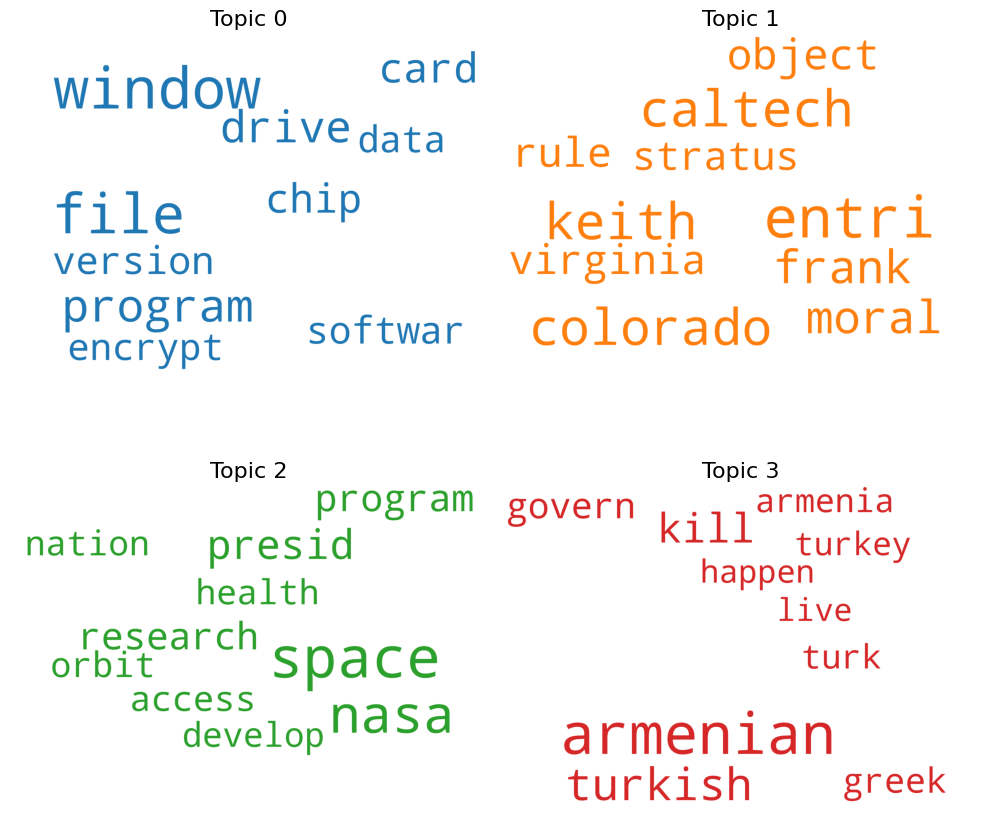

In [86]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [89]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dictionary=lda_model.id2word)
vis

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=16485) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <number>
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/_utils.py:38: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  if isinstance(node, ast.Num):  # <numbe

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.155670 -0.131810       1        1  23.702143
4     -0.094019 -0.018717       2        1  20.219834
2      0.007434 -0.049644       3        1  14.015760
6      0.115585 -0.031581       4        1  11.362466
5      0.085500  0.236877       5        1  10.056263
3     -0.150729  0.016650       6        1   8.179262
1      0.042418  0.007396       7        1   6.837294
7     -0.161858 -0.029169       8        1   5.626978, topic_info=          Term         Freq        Total Category  logprob  loglift
1144      game  1960.000000  1960.000000  Default  30.0000  30.0000
988     window  3039.000000  3039.000000  Default  29.0000  29.0000
655       team  1623.000000  1623.000000  Default  28.0000  28.0000
1772  armenian  1308.000000  1308.000000  Default  27.0000  27.0000
284       file  2942.000000  2942.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
1849   countri   192.764199   883.574434   Topic8  -5.6893   1.3551
465      human   199.404828  1169.159958   Topic8  -5.6555   1.1089
300       appl   183.988442   898.715698   Topic8  -5.7359   1.2915
483       live   177.231556  1622.096069   Topic8  -5.7733   0.6636
350       true   169.726155  1358.819538   Topic8  -5.8166   0.7974

[625 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
5864      7  0.962501     aber
299       1  0.172987   accept
299       2  0.565771   accept
299       3  0.047826   accept
299       4  0.005088   accept
...     ...       ...      ...
5127      8  0.922028  zionist
3141      3  0.011543   zoolog
3141      4  0.969639   zoolog
3141      6  0.011543   zoolog
1845      6  0.996886     zuma

[2125 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 3, 7, 6, 4, 2, 8])

In [35]:
from sklearn.feature_extraction.text import CountVectorizer



cvec = CountVectorizer()

# Fitting the vectorizer on our training data

cvec.fit(newsgroups_train['data'])



CountVectorizer()

In [41]:
cvec = CountVectorizer(stop_words='english')

cvec.fit(newsgroups_train['data'])
cvec_mat = cvec.transform(newsgroups_train['data'])

words = cvec.get_feature_names()

a = cvec_mat.sum(axis=0)
pd.DataFrame(a,columns=words).transpose().sort_values(by=0,ascending=False).head(10)

0
ax            62406
edu           21321
subject       12264
com           12133
lines         11835
organization  11233
writes         7844
article        7438
people         5975
don            5953

In [43]:
# filter

a = cvec_mat[newsgroups_train
             .target==1].sum(axis=0)
pd.DataFrame(a,columns=words).transpose().sort_values(by=0,ascending=False).head()

0
edu           1037
lines          645
subject        625
graphics       604
organization   575

<Axes: >

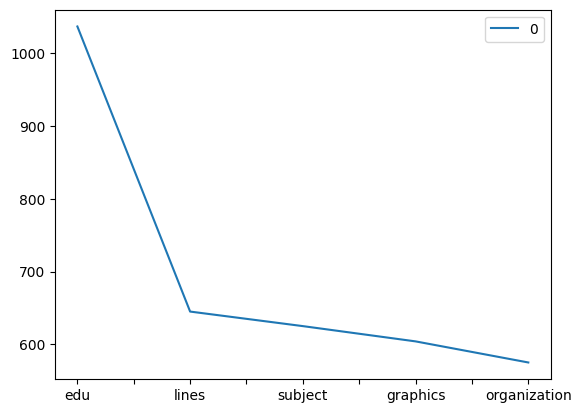

In [82]:
pd.DataFrame(a,columns=words).transpose().sort_values(by=0,ascending=False).head().plot()

In [48]:

# another way to check word frequency, after converting to array

df_cvec = pd.DataFrame(cvec_mat.toarray(),columns=cvec.get_feature_names_out())
df_cvec.sum(axis=0).sort_values(ascending=False)[:10]


ax              62406
edu             21321
subject         12264
com             12133
lines           11835
organization    11233
writes           7844
article          7438
people           5975
don              5953
dtype: int64

In [54]:
X_train = cvec_mat
y_train = newsgroups_train.target
X_test = cvec.transform(newsgroups_test.data)
y_test = newsgroups_test.target


In [90]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='lbfgs', multi_class='ovr')
lr.fit(X_train, y_train)
print("score:")
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score:
0.999734841788934
0.8131970260223048
